Exploratory Data Analysis(EDA): It is a also known as Data Exploration.  
    * EDA --- We use many techniques to understand the Dataset.

Data Source Location: Kaggle

https://www.kaggle.com/datasets/kacpergregorowicz/-mens-volleyball-plusliga-20082022


The data was collected from the official Plus Liga’s website and contains matches played from seasons 2008/2009 to 2022/2023.

Data Source was discovered based on my interests, I am a fan of volleyball, and I am a player too.

Data is free to download, it is public data.

Data is legal to Access since it is released to the public.

There is no pre-documentation is present for the dataset provided above.

Data size is 2562 rows and 44 columns, 459KB.

The Dataset provided can be used to make an analysis and study the team statistics. Based on the statistics, we can predict the future game's outcome.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random as rnd

vdf=pd.read_csv('Mens-Volleyball-PlusLiga-2008-2022.csv')


* Column names explanation (T1 refers to Team_1 and T2 refers to Team_2):

  Date - Date and time at which the match was played

  Team_1 and Team_2 - Name of the teams

  Score - Number of sets won

  Sum - Total number of points gained

  BP - Points scored in a counterattack on your own serve

  Ratio - Points gained - points lost

  Srv_Sum - Number of all serves
  
  Srv_Err - Number of serve errors
  
  Srv_Ace - Number of points gained from an ace
  
  Srv_Eff - Serve effectiveness in %
  
  Rec_Sum - Number of all serve receptions
  
  Rec_Err - Number of serve reception errors
  
  Rec_Pos - Percent of postive serve receptions
  
  Rec_Perf - Percent of perfect serve receptions

  Att_Sum - Total number of attacks
  
  Att_Err - Number of attack errors
  
  Att_Blk - Number of attacks that were blocked
  
  Att_Kill - Total number of points scored in attack
  
  Att_Kill_Perc - Percent of attacks that scored a point
  
  Att_Eff - Attack effectiveness in %
  
  Blk_Sum - Number of points gained with a block
  
  Blk_As - Number of blocks that allow a team which was blocking to do a counterattack
  
  Winner - 0 if Team 1 won, 1 if Team 2 won

In [2]:
# shape and columns gives just number of columns and rows. 
# It also gives the column information.
# info() gives total information, instead of using both.

vdf.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 44 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Date              2561 non-null   object
 1   Team_1            2561 non-null   object
 2   Team_2            2561 non-null   object
 3   T1_Score          2561 non-null   int64 
 4   T2_Score          2561 non-null   int64 
 5   T1_Sum            2561 non-null   int64 
 6   T1_BP             2561 non-null   int64 
 7   T1_Ratio          2561 non-null   int64 
 8   T1_Srv_Sum        2561 non-null   int64 
 9   T1_Srv_Err        2561 non-null   object
 10  T1_Srv_Ace        2561 non-null   int64 
 11  T1_Srv_Eff        2561 non-null   object
 12  T1_Rec_Sum        2561 non-null   int64 
 13  T1_Rec_Err        2561 non-null   int64 
 14  T1_Rec_Pos        2561 non-null   object
 15  T1_Rec_Perf       2561 non-null   object
 16  T1_Att_Sum        2561 non-null   object
 17  T1_Att_Err    

In [3]:
vdf.head()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,...,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
0,1/10/2022 14:45,AZS Olsztyn,ZAKSA Kędzierzyn-Koźle,1,3,60,17,11,79,18,...,26%,88,7,7,45,51%,35%,14,11,1
1,9/30/2022 17:30,Jastrzębski Węgiel,GKS Katowice,3,0,51,17,27,77,15,...,20%,91,8,4,43,47%,34%,1,17,0
2,1/10/2022 20:30,LUK Lublin,Czarni Radom,2,3,76,23,35,109,16,...,18%,128,10,10,63,49%,33%,10,13,1
3,2/10/2022 14:45,Warta Zawiercie,PGE Skra Bełchatów,3,2,66,16,22,98,21,...,9%,102,9,9,56,54%,37%,7,14,0
4,3/10/2022 17:30,BBTS Bielsko-Biała,Cuprum Lubin,1,3,63,22,17,100,19,...,22%,109,7,8,58,53%,39%,10,10,1


In [4]:
vdf.tail()

,Date,Team_1,Team_2,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Err,...,T2_Rec_Perf,T2_Att_Sum,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Att_Kill_Perc,T2_Att_Eff,T2_Blk_Sum,T2_Blk_As,Winner
2556,3/20/2010 17:00,Pamapol Wielton Wieluń,AZS Częstochowa,3,0,50,74,6,11,"2,00",...,26,43%,70,9,9,27,39%,7,"2,33",0
2557,3/19/2010 18:00,ZAKSA Kędzierzyn-Koźle,AZS Olsztyn,3,0,54,74,4,11,"1,33",...,14,22%,80,10,9,28,35%,9,"3,00",0
2558,3/20/2010 17:00,PGE Skra Bełchatów,Jadar Radom,3,0,54,75,5,12,"1,67",...,11,17%,66,7,8,35,53%,5,"1,67",0
2559,3/20/2010 17:00,Asseco Resovia,Projekt Warszawa,3,0,55,73,8,6,"2,67",...,16,23%,82,8,6,31,38%,6,"2,00",0
2560,3/20/2010 14:45,Chemik Bydgoszcz,Jastrzębski Węgiel,0,3,43,64,1,12,"0,33",...,26,50%,73,7,1,42,58%,7,"2,33",1


In [5]:
# gives null values

vdf.isnull().sum()

Date                0
Team_1              0
Team_2              0
T1_Score            0
T2_Score            0
T1_Sum              0
T1_BP               0
T1_Ratio            0
T1_Srv_Sum          0
T1_Srv_Err          0
T1_Srv_Ace          0
T1_Srv_Eff          0
T1_Rec_Sum          0
T1_Rec_Err          0
T1_Rec_Pos          0
T1_Rec_Perf         0
T1_Att_Sum          0
T1_Att_Err          0
T1_Att_Blk          0
T1_Att_Kill         0
T1_Att_Kill_Perc    0
T1_Att_Eff          0
T1_Blk_Sum          0
T1_Blk_As           0
T2_Sum              0
T2_BP               0
T2_Ratio            0
T2_Srv_Sum          0
T2_Srv_Err          0
T2_Srv_Ace          0
T2_Srv_Eff          0
T2_Rec_Sum          0
T2_Rec_Err          0
T2_Rec_Pos          0
T2_Rec_Perf         0
T2_Att_Sum          0
T2_Att_Err          0
T2_Att_Blk          0
T2_Att_Kill         0
T2_Att_Kill_Perc    0
T2_Att_Eff          0
T2_Blk_Sum          0
T2_Blk_As           0
Winner              0
dtype: int64

### Since there are no Null values, we can proceed without any hindrance

In [6]:
vdf.nunique(axis=0)
vdf.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,T1_Score,T2_Score,T1_Sum,T1_BP,T1_Ratio,T1_Srv_Sum,T1_Srv_Ace,T1_Rec_Sum,T1_Rec_Err,T1_Att_Err,...,T2_Ratio,T2_Srv_Sum,T2_Srv_Ace,T2_Rec_Sum,T2_Rec_Err,T2_Att_Err,T2_Att_Blk,T2_Att_Kill,T2_Blk_Sum,Winner
count,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,...,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000,2561.000000
mean,2.039047,1.784850,61.761031,72.228817,9.691136,29.410387,56.295588,28.807107,29.102694,79.442405,...,9.173370,29.326435,57.598985,29.676689,29.029285,79.829364,7.691917,17.547442,8.620851,0.459196
std,1.176278,1.257237,13.119727,30.384232,10.670906,30.445980,30.272959,23.147073,15.466496,43.050914,...,10.603748,30.203109,30.384792,22.967983,15.184861,43.097656,3.288945,16.808300,3.757848,0.498430
min,0.000000,0.000000,22.000000,4.000000,-10.000000,3.000000,0.000000,1.000000,0.000000,0.000000,...,-9.000000,3.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,53.000000,58.000000,3.000000,12.000000,42.000000,14.000000,20.000000,65.000000,...,3.000000,12.000000,46.000000,15.000000,21.000000,66.000000,5.000000,7.000000,6.000000,0.000000
50%,3.000000,2.000000,62.000000,75.000000,6.000000,15.000000,64.000000,20.000000,31.000000,89.000000,...,5.000000,16.000000,65.000000,21.000000,31.000000,89.000000,7.000000,11.000000,8.000000,0.000000
75%,3.000000,3.000000,72.000000,97.000000,9.000000,22.000000,81.000000,30.000000,40.000000,112.000000,...,9.000000,22.000000,81.000000,31.000000,40.000000,113.000000,10.000000,16.000000,11.000000,1.000000
max,3.000000,3.000000,94.000000,127.000000,58.000000,120.000000,115.000000,104.000000,73.000000,161.000000,...,51.000000,121.000000,114.000000,104.000000,73.000000,178.000000,21.000000,76.000000,21.000000,1.000000


#### max and min are checked and everything seems to be checked for sanity checks

In [7]:
vdf2 = vdf[['Date','Team_1','Team_2','T1_Score','T1_Sum','T2_Score','T2_Sum','T1_Ratio','T2_Ratio','T1_Att_Sum','T1_Att_Eff','T1_Blk_Sum','T2_Att_Sum','T2_Att_Eff','T2_Blk_Sum','Winner']].copy()

#### The above columns are considered to visualize and explore the Data.

In [8]:
vdf2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2561 entries, 0 to 2560
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2561 non-null   object
 1   Team_1      2561 non-null   object
 2   Team_2      2561 non-null   object
 3   T1_Score    2561 non-null   int64 
 4   T1_Sum      2561 non-null   int64 
 5   T2_Score    2561 non-null   int64 
 6   T2_Sum      2561 non-null   int64 
 7   T1_Ratio    2561 non-null   int64 
 8   T2_Ratio    2561 non-null   int64 
 9   T1_Att_Sum  2561 non-null   object
 10  T1_Att_Eff  2561 non-null   object
 11  T1_Blk_Sum  2561 non-null   int64 
 12  T2_Att_Sum  2561 non-null   object
 13  T2_Att_Eff  2561 non-null   object
 14  T2_Blk_Sum  2561 non-null   int64 
 15  Winner      2561 non-null   int64 
dtypes: int64(9), object(7)
memory usage: 320.2+ KB


In [9]:
vdf2.head()

,Date,Team_1,Team_2,T1_Score,T1_Sum,T2_Score,T2_Sum,T1_Ratio,T2_Ratio,T1_Att_Sum,T1_Att_Eff,T1_Blk_Sum,T2_Att_Sum,T2_Att_Eff,T2_Blk_Sum,Winner
0,1/10/2022 14:45,AZS Olsztyn,ZAKSA Kędzierzyn-Koźle,1,60,3,69,11,38,100,26%,7,88,35%,14,1
1,9/30/2022 17:30,Jastrzębski Węgiel,GKS Katowice,3,51,0,48,27,16,88,43%,4,91,34%,1,0
2,1/10/2022 20:30,LUK Lublin,Czarni Radom,2,76,3,82,35,40,115,40%,10,128,33%,10,1
3,2/10/2022 14:45,Warta Zawiercie,PGE Skra Bełchatów,3,66,2,71,22,25,92,40%,9,102,37%,7,0
4,3/10/2022 17:30,BBTS Bielsko-Biała,Cuprum Lubin,1,63,3,80,17,32,97,34%,8,109,39%,10,1


In [10]:
vdf2.tail()

,Date,Team_1,Team_2,T1_Score,T1_Sum,T2_Score,T2_Sum,T1_Ratio,T2_Ratio,T1_Att_Sum,T1_Att_Eff,T1_Blk_Sum,T2_Att_Sum,T2_Att_Eff,T2_Blk_Sum,Winner
2556,3/20/2010 17:00,Pamapol Wielton Wieluń,AZS Częstochowa,3,50,0,34,6,0,48%,52%,9,43%,39%,7,0
2557,3/19/2010 18:00,ZAKSA Kędzierzyn-Koźle,AZS Olsztyn,3,54,0,39,4,2,39%,55%,9,22%,35%,9,0
2558,3/20/2010 17:00,PGE Skra Bełchatów,Jadar Radom,3,54,0,43,5,4,27%,59%,8,17%,53%,5,0
2559,3/20/2010 17:00,Asseco Resovia,Projekt Warszawa,3,55,0,37,8,1,38%,48%,5,23%,38%,6,0
2560,3/20/2010 14:45,Chemik Bydgoszcz,Jastrzębski Węgiel,0,43,3,50,1,1,40%,46%,1,50%,58%,7,1


In [11]:
vdf3=vdf2.sort_values(by = 'Team_1')

#### We can sort the data based on the team names.

In [12]:
vdf3

,Date,Team_1,Team_2,T1_Score,T1_Sum,T2_Score,T2_Sum,T1_Ratio,T2_Ratio,T1_Att_Sum,T1_Att_Eff,T1_Blk_Sum,T2_Att_Sum,T2_Att_Eff,T2_Blk_Sum,Winner
2038,4/22/2012 15:00,AZS Częstochowa,Chemik Bydgoszcz,1,62,3,69,4,0,30%,35%,13,39%,46%,11,1
2346,10/24/2008 18:00,AZS Częstochowa,Trefl Gdańsk,3,87,2,70,7,8,45%,51%,14,40%,42%,7,0
1789,7/12/2013 17:00,AZS Częstochowa,Asseco Resovia,0,49,3,57,0,1,15%,45%,9,25%,53%,7,1
1408,2/27/2016 20:00,AZS Częstochowa,Jastrzębski Węgiel,2,66,3,81,3,7,23%,42%,7,25%,48%,16,1
2355,8/11/2008 17:00,AZS Częstochowa,AZS Olsztyn,0,47,3,58,5,6,28%,41%,5,38%,51%,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541,2/22/2021 17:30,Ślepsk Malow Suwałki,Trefl Gdańsk,3,64,1,67,31,17,88,35%,12,113,25%,8,0
481,12/14/2020 17:30,Ślepsk Malow Suwałki,Asseco Resovia,3,69,1,61,35,19,102,32%,8,108,27%,10,0
496,12/22/2020 20:30,Ślepsk Malow Suwałki,Cuprum Lubin,3,69,1,61,39,25,112,44%,4,116,34%,4,0
256,6/1/2022 17:30,Ślepsk Malow Suwałki,Warta Zawiercie,0,39,3,55,9,26,70,35%,3,75,46%,5,1


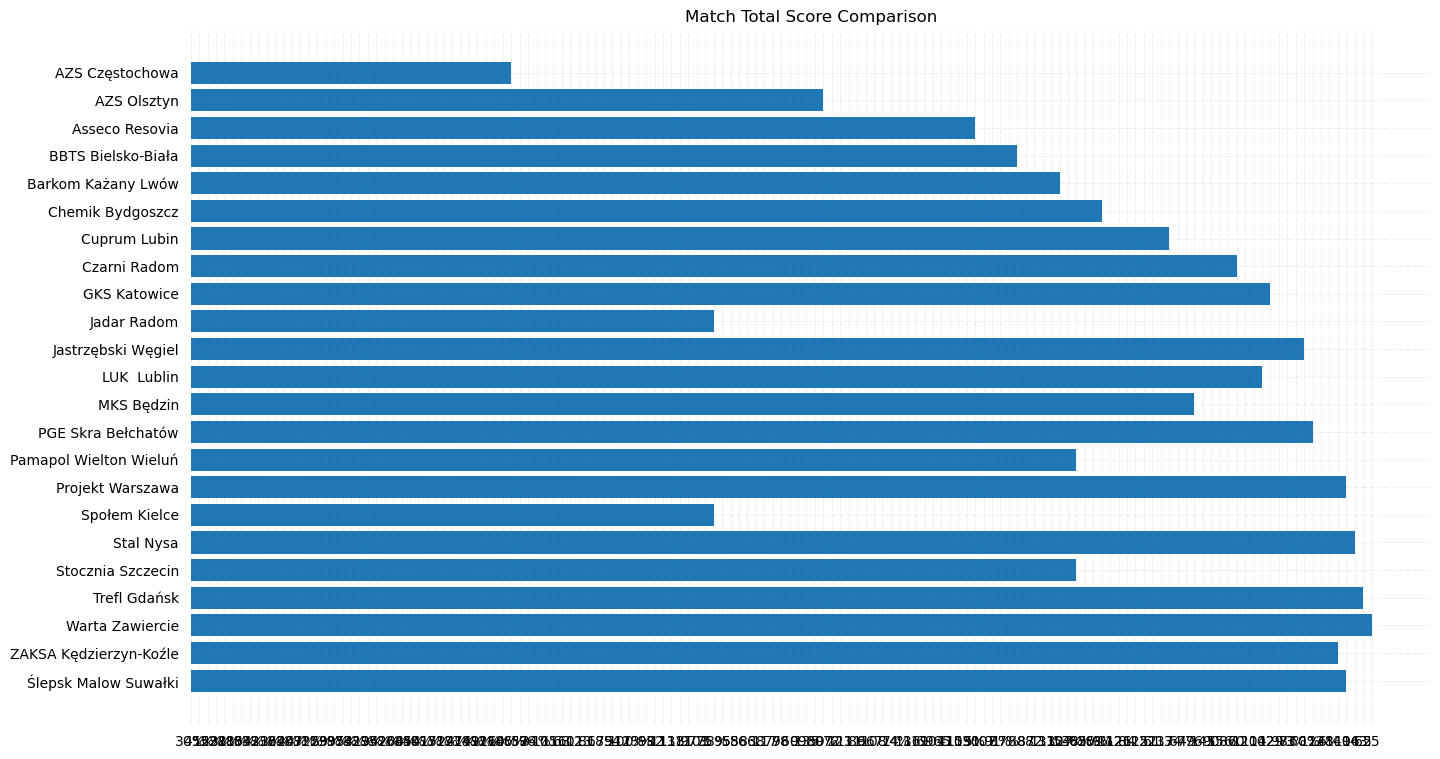

In [13]:
# inverted bar plot to visualize the teams scores.

Team_1 = vdf3['Team_1']
Team_2 = vdf3['Team_2']
Winner = vdf3['Winner']
T1_Total_Points = vdf3['T1_Att_Sum']
T2_Total_Points = vdf3['T2_Att_Sum']
 
# Figure Size
fig, ax = plt.subplots(figsize =(16, 9))
 
# Horizontal Bar Plot
ax.barh(Team_1,T1_Total_Points)
 
# Remove axes splines
for s in ['top', 'bottom', 'left', 'right']:
    ax.spines[s].set_visible(False)

#Remove x, y Ticks
ax.xaxis.set_ticks_position('none')
ax.yaxis.set_ticks_position('none')
 
# Add padding between axes and labels
ax.xaxis.set_tick_params(pad = 5)
ax.yaxis.set_tick_params(pad = 5)
 
# Adding gridlines 
ax.grid(visible = True, color ='grey',
        linestyle ='-.', linewidth = 0.5,
        alpha = 0.2)
 
ax.invert_yaxis()
# Adding title
ax.set_title('Match Total Score Comparison',
             loc ='center', )
plt.show()

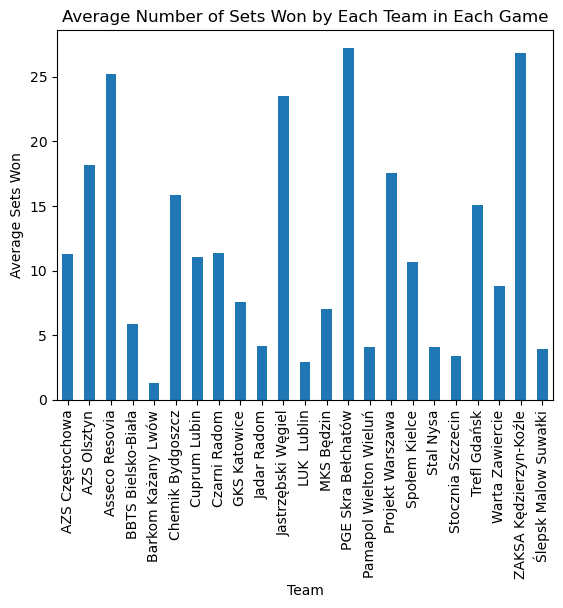

In [14]:
# Bar plot conveys the information of sets won in each game by each team.

sets_won = vdf3.groupby(["Team_1", "Team_2"])["T1_Score"].sum().groupby("Team_1").mean()
sets_won.plot(kind="bar")
plt.title("Average Number of Sets Won by Each Team in Each Game")
plt.xlabel("Team")
plt.ylabel("Average Sets Won")
plt.show()

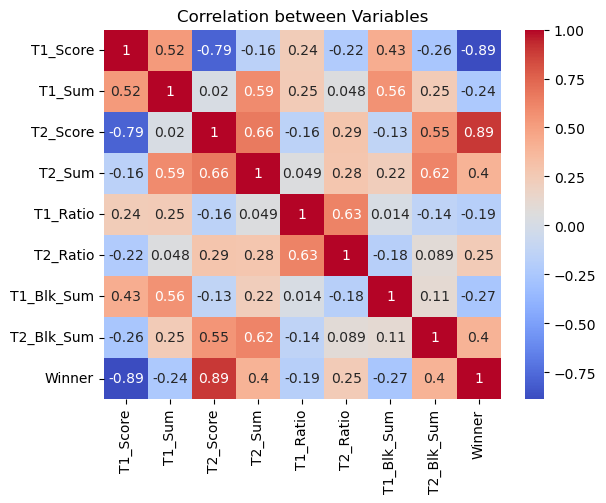

In [15]:
# HeatMap shows the correlation between all the variables of the DataSet.

corr = vdf3.corr()
sns.heatmap(corr, cmap="coolwarm", annot=True)
plt.title("Correlation between Variables")
plt.show()

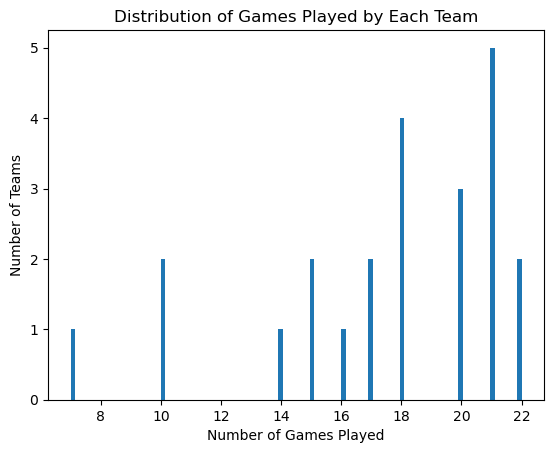

In [16]:
# distribution of games played by each team.

games_played = vdf3.groupby("Team_1")["Team_2"].nunique()
plt.hist(games_played, bins=100)
plt.title("Distribution of Games Played by Each Team")
plt.xlabel("Number of Games Played")
plt.ylabel("Number of Teams")
plt.show()

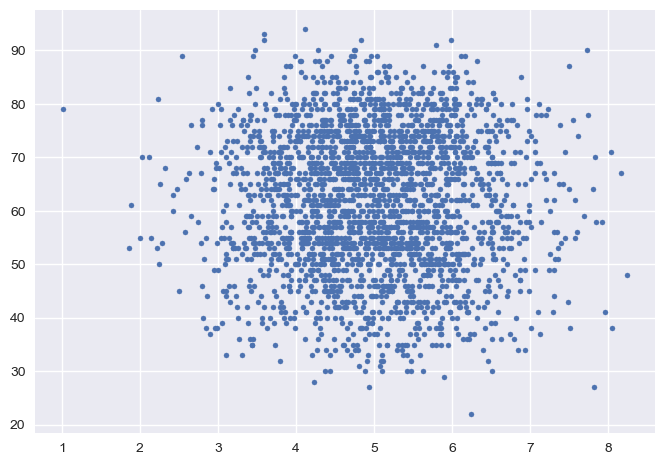

In [17]:

x = np.random.normal(5.0, 1.0, 2561)
y = vdf3['T1_Sum']

plt.style.use('seaborn')
plt.scatter(x, y,s=13)

plt.show()

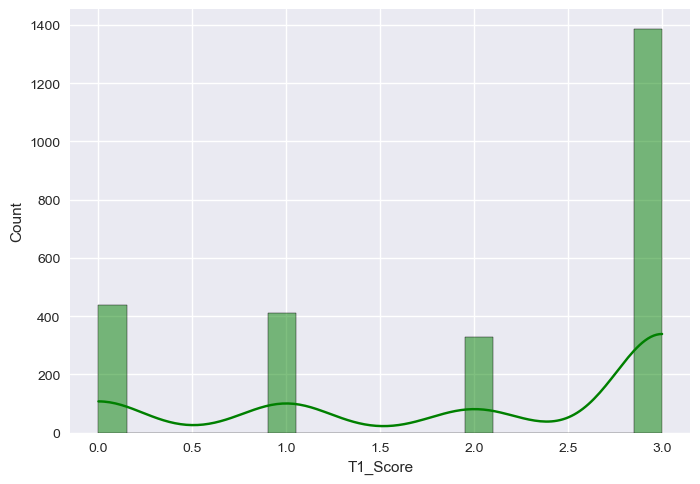

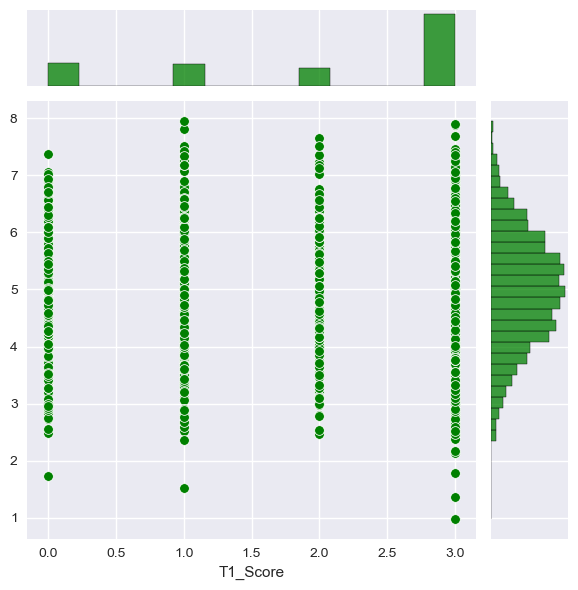

In [18]:
from warnings import filterwarnings
df = vdf3
sns.histplot(df['T1_Score'],kde = True, color ='green', bins = 20)
sns.jointplot(x =df['T1_Score'],color ='green', y =np.random.normal(5.0, 1.0, 2561), data = df)

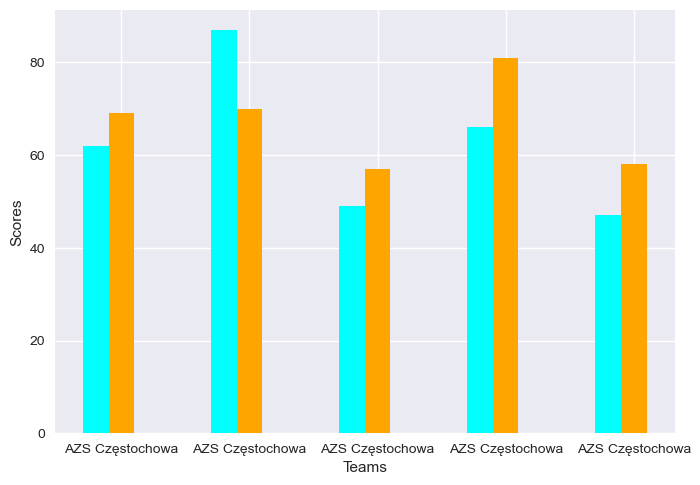

In [19]:
x = np.arange(5)
y1 = vdf3['T1_Sum'].head()
y2 = vdf3['T2_Sum'].head()

width = 0.2

# plot data in grouped manner of bar type
plt.bar(x-0.2, y1, width, color='cyan')
plt.bar(x, y2, width, color='orange')


plt.xticks(x, vdf3['Team_1'].head())
plt.xlabel("Teams")
plt.ylabel("Scores")

plt.show()